<a href="https://colab.research.google.com/github/Raiskng/case-7-dnc/blob/main/Desafio_7_DNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clustering de clientes
Desafio DNC

In [56]:
#Instalar bibliotecas necessárias
!pip install pandas
!pip install chardet
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import chardet
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.datasets import make_blobs
!pip install scikit-learn
from sklearn import datasets
import pandas as pd
import string

- Com base em avaliações na nossa base de dados, é notável que é uma base de dados grande e que muitos desses valores não são necessários para o tratamento do mesmo. No decorrer do código, mostrarei como tratar esses dados e quais tem sua devida importância para o Target final.


In [3]:
#Importar e carregar a base de dados
df = pd.read_csv('/content/data.csv', encoding='latin-1', sep=',', header=0, on_bad_lines='skip')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
#Descrição dos dados para entender cada coluna
df.describe()

,Quantity,UnitPrice,CustomerID
count,288707.000000,288706.000000,207055.000000
mean,9.413454,5.013689,15278.445703
std,204.194330,112.381480,1732.456903
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13837.000000
50%,3.000000,2.100000,15144.000000
75%,10.000000,4.130000,16818.000000
max,74215.000000,38970.000000,18287.000000


In [5]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
#Eliminando colunas sem relevância para o tratamento dos dados
df = df.drop(columns=["InvoiceNo","StockCode", "Description", "Country"])

In [7]:
df.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID
0,6,12/1/2010 8:26,2.55,17850.0
1,6,12/1/2010 8:26,3.39,17850.0
2,8,12/1/2010 8:26,2.75,17850.0
3,6,12/1/2010 8:26,3.39,17850.0
4,6,12/1/2010 8:26,3.39,17850.0


In [8]:
#Eliminando valores nulos, faltantes, outliers e inconsistências
df.isna().any()

Quantity       False
InvoiceDate    False
UnitPrice       True
CustomerID      True
dtype: bool

In [9]:
# Validando e eliminando dados duplicados
df.duplicated(keep=False).sum()

177587

In [10]:
(df
 .groupby
 (df.columns.tolist(), dropna=False)
 .size()
 .to_frame('n_duplicates')
 .query('n_duplicates>1')
 .sort_values('n_duplicates', ascending=False)
 .head(5)
)

n_duplicates
Quantity InvoiceDate     UnitPrice CustomerID              
1        12/7/2010 15:28 2.51      NaN                   53
         6/29/2011 15:58 2.46      NaN                   52
         12/1/2010 14:32 2.51      NaN                   52
         7/5/2011 16:53  2.46      NaN                   50
         12/9/2010 14:09 2.51      NaN                   49

In [11]:
df.drop_duplicates()

,Quantity,InvoiceDate,UnitPrice,CustomerID
0,6,12/1/2010 8:26,2.55,17850.0
1,6,12/1/2010 8:26,3.39,17850.0
2,8,12/1/2010 8:26,2.75,17850.0
5,2,12/1/2010 8:26,7.65,17850.0
6,6,12/1/2010 8:26,4.25,17850.0
...,...,...,...,...
288701,10,8/3/2011 12:50,1.45,16102.0
288702,12,8/3/2011 12:50,1.45,16102.0
288704,12,8/3/2011 12:50,3.75,16102.0
288705,10,8/3/2011 12:50,1.65,16102.0


In [12]:
#Corrigindo o tipo de cada coluna
df = df.astype({'Quantity': 'int',
                'UnitPrice':'float',})
df.dtypes

Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
dtype: object

In [13]:
missing_values = df.isnull().sum()
print(missing_values)

Quantity           0
InvoiceDate        0
UnitPrice          1
CustomerID     81652
dtype: int64


In [14]:
#Removendo dados nulos da coluna CustumerID
df.dropna(subset=['CustomerID'], inplace=False)

,Quantity,InvoiceDate,UnitPrice,CustomerID
0,6,12/1/2010 8:26,2.55,17850.0
1,6,12/1/2010 8:26,3.39,17850.0
2,8,12/1/2010 8:26,2.75,17850.0
3,6,12/1/2010 8:26,3.39,17850.0
4,6,12/1/2010 8:26,3.39,17850.0
...,...,...,...,...
288701,10,8/3/2011 12:50,1.45,16102.0
288702,12,8/3/2011 12:50,1.45,16102.0
288703,12,8/3/2011 12:50,1.45,16102.0
288704,12,8/3/2011 12:50,3.75,16102.0


In [15]:
missing_values = df.isnull().sum()
print(missing_values)

Quantity           0
InvoiceDate        0
UnitPrice          1
CustomerID     81652
dtype: int64


In [16]:
#Transformando a coluna data no formato correto
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"]).dt.strftime('%Y-%m-%d')
df.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID
0,6,2010-12-01,2.55,17850.0
1,6,2010-12-01,3.39,17850.0
2,8,2010-12-01,2.75,17850.0
3,6,2010-12-01,3.39,17850.0
4,6,2010-12-01,3.39,17850.0


<Axes: >

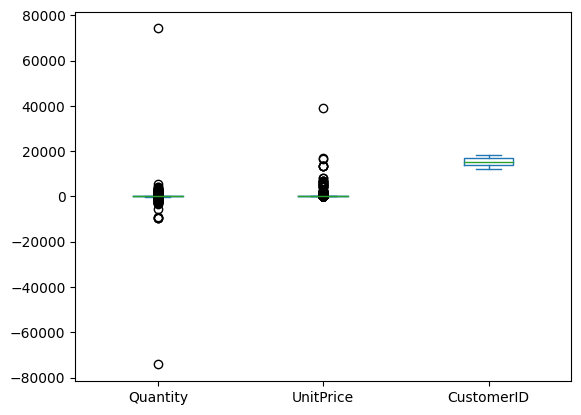

In [17]:
#Validando e corrigindo outliers
df.plot.box()

In [18]:
#Mostrando os percentis de cada quartil
df.describe(percentiles=[.01, .25, .5, .75, .9, .99])

,Quantity,UnitPrice,CustomerID
count,288707.000000,288706.000000,207055.000000
mean,9.413454,5.013689,15278.445703
std,204.194330,112.381480,1732.456903
min,-74215.000000,0.000000,12346.000000
1%,-2.000000,0.210000,12413.000000
25%,1.000000,1.250000,13837.000000
50%,3.000000,2.100000,15144.000000
75%,10.000000,4.130000,16818.000000
90%,24.000000,7.950000,17725.000000
99%,100.000000,19.960000,18221.000000


In [33]:
def cap_values(array, lower_quantile=0., upper_quantile=1.):
  array = array.copy()

  lower_quantile = np.quantile(array, lower_quantile)
  upper_quantile = np.quantile(array, upper_quantile)

  array[array<lower_quantile] = lower_quantile
  array[array>upper_quantile] = upper_quantile

  return array

In [36]:
#Aplicando a função em todas as colunas
cap_values(df['CustomerID'], upper_quantile=.90).max()

18287.0

In [37]:
cap_values(df['UnitPrice'], upper_quantile=.90).max()

38970.0

In [38]:
cap_values(df['Quantity'], upper_quantile=.90).max()

24

A coluna 'InvoiceDate' não tem necessidade de receber a função acima justamente pelo formato dos dados desta coluna.

A seguir, selecionei o algoritimo DBSCAN, o algoritimo que mais se encaixou no modelo.

In [57]:
X,y = datasets.make_blobs(n_samples=int(5E3), n_features=3, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B,C
0,0.948451,-1.521747,3.246080
1,1.422835,-1.474223,2.218978
2,2.404195,-1.634781,2.972398
3,-0.914886,9.082504,8.903313
4,-3.350380,6.180430,1.522472


In [58]:
#Treinando o DBSCAN
model = DBSCAN()
labels = model.fit_predict(X)

In [66]:
scatter_kwargs = {'alpha': 0.9, 's': 50}

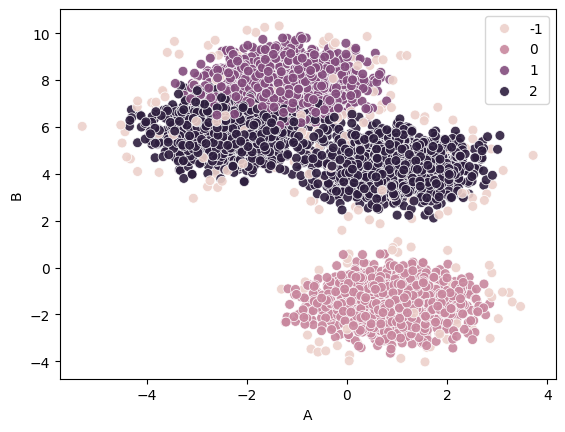

In [73]:
#Visualizando os outputs
scatter_kwargs = {'alpha': 0.9, 's': 50}
sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs);

Nota-se que o maior perfil de compra, são dos clientes em cor 2.
O cluster acima pode ser útil visando quais os produtos mais comprados por esses clientes com mais atividade de compra(cor 2), com base nisto, pode ser feito um levantamento de campanha do MKT, em ideias de como investir em produtos mais interessantes para incentivar ainda mais a compra de produtos desses clientes frequentes.